<a href="https://colab.research.google.com/github/Josshua-DSA/Sentiment-Analysis-KontenX/blob/main/Sentiment_Analysis_(TM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CRAWLING DATA
1. Joshua Remedial Syeba
2. Amelia Rahmadhini
3. Muhammad Naufal Al Kayyis
4. Naufal Hilmi Darmawan
5. Shafa Maulida F.
6. Dhini Fita Amanda
7. Ziyad Yusuf Fauzan

# BTW ini Sentiment buat yang bensin-bensin itu

In [ ]:
# # auth-token placement

# twitter_auth_token = "33f7b79b014b7b313dfce018ef03a31f5bb78362"

Ekstrak auth token dari inspect pada konten salah satu

In [ ]:
# # install node.js
# !sudo apt-get update
# !sudo apt-get install -y ca-certificates curl gnupg
# !sudo mkdir -p /etc/apt/keyrings
# !curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

# !NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

# !sudo apt-get update
# !sudo apt-get install nodejs -y

# !node -v

Mulai Process Crawl Data

In [ ]:
# # Crawl Data

# filename = 'BBM(kompas_7oct).csv'
# search_keyword = 'bensin since:2025-10-7 until:2025-10-14 lang:id'
# limit = 300

# !npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

Ekstrak File data

In [ ]:
# import pandas as pd

# # Specify the path to your CSV file
# file_path = f"tweets-data/{filename}"

# # Read the CSV file into a pandas DataFrame
# df = pd.read_csv(file_path, delimiter=",")

# # Display the DataFrame
# display(df)

Cek Jumlah Tweet

In [ ]:
# # Cek jumlah data yang didapatkan

# num_tweets = len(df)
# print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

In [ ]:
# df.info()

In [ ]:
# df = df [["created_at","full_text"]]
# df.head()


# Simpan data ke Gdrive dengan Mounting

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# df.to_csv("/content/drive/MyDrive/dataset/bbm.csv", index=False)

# ANALISIS SENTIMEN

# 1. Ekstrak Dataset

In [ ]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1) Load your data
csv_path = "bbm.csv"
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,created_at,full_text
0,Mon Oct 13 16:31:29 +0000 2025,Bisa karena terbiasa malem ini melipir pom ben...
1,Mon Oct 13 16:31:13 +0000 2025,@deveereeaux Siap topping-nya bensin full tank...
2,Mon Oct 13 16:25:00 +0000 2025,@BIAG3NCY Gua bawa korek lu bawa bensin ya
3,Mon Oct 13 16:21:30 +0000 2025,Tangki motor itu ndak boleh di isi air Radiato...
4,Mon Oct 13 16:19:20 +0000 2025,@dinounaraa @szakumi_ padahal gapapa loh tapi ...


DataFrame bbm.csv menampilkan lima baris pertama dari kumpulan data yang berisi dua kolom utama: created_at dan full_text. Kolom created_at berisi tanggal serta waktu pembuatan setiap tweet dalam format standar Twitter API (UTC), sedangkan full_text berisi isi teks tweet secara lengkap. Berdasarkan potongan data, semua tweet dikirim pada tanggal 13 Oktober 2025, yang menandakan bahwa data ini kemungkinan diambil dalam satu hari atau dalam periode waktu yang sangat sempit. Isi teks banyak mengandung kata “bensin”, “pom”, dan konteks seputar kendaraan, yang mengindikasikan bahwa topik utama pembahasan pengguna di dataset ini berkaitan dengan aktivitas atau percakapan seputar bahan bakar motor (BBM). Analisis ini menjadi langkah awal untuk eksplorasi teks lebih lanjut seperti text cleaning, sentiment analysis, atau topic modeling guna memahami konteks dan persepsi pengguna terhadap isu tersebut.

#2. Text Cleaning
Ziyad Yusuf FaHujan

In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.1 MB/s eta 0:00:00


In [ ]:
# Library
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Cleaning Text

# Siapkan stopwords dan stemmer dari Sastrawi
stop_factory = StopWordRemoverFactory()
stopwords = set(stop_factory.get_stop_words())

# Tambahkan stopword tambahan khas media sosial
extra_stopwords = {
    'yg', 'aja', 'nih', 'sih', 'dong', 'ya', 'aku', 'akuuu',
    'bang', 'banget', 'loh', 'lah', 'nya', 'deh', 'kak', 'bro',
    'dr', 'udh', 'udah', 'dah', 'gitu', 'gak', 'ga', 'gk'
}
stopwords.update(extra_stopwords)

stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()

# Kamus normalisasi kata tidak baku
normalisasi = {
    'gk': 'tidak', 'ga': 'tidak', 'bgt': 'banget',
    'anjir': 'anjing', 'anjay': 'anjing', 'yg': 'yang', 'tp': 'tapi',
    'aja': 'saja', 'klo': 'kalau', 'tdk': 'tidak', 'udh': 'sudah',
    'dr': 'dari', 'dl': 'dulu', 'dgn': 'dengan', 'jg': 'juga', 'sm': 'sama',
    'trs': 'terus', 'jgk': 'juga', 'trnyta': 'ternyata', 'bkn': 'bukan'
}

def clean_tweet(text):
    # Pastikan input berupa string
    if not isinstance(text, str):
        return ""

    # 1. Hapus mention, hashtag, dan URL
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+', '', text)

    # 2. Hapus emoji dan karakter non-teks
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emotikon
        u"\U0001F300-\U0001F5FF"  # simbol & pictograf
        u"\U0001F680-\U0001F6FF"  # transportasi
        u"\U0001F1E0-\U0001F1FF"  # bendera
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)

    # 3. Ubah ke huruf kecil
    text = text.lower()

    # 4. Hapus tanda baca, angka, dan karakter ganda seperti "hhh" atau "www"
    text = re.sub(r'[^a-z\s]', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)  # contoh: "bensinnnn" → "bensin"

    # 5. Tokenisasi
    tokens = word_tokenize(text)

    # 6. Normalisasi kata tidak baku
    tokens = [normalisasi.get(word, word) for word in tokens]

    # 7. Hilangkan stopwords
    tokens = [word for word in tokens if word not in stopwords and len(word) > 2]

    # 8. Stemming
    text_stemmed = stemmer.stem(' '.join(tokens))

    # 9. Hapus spasi berlebih
    text_stemmed = re.sub(r'\s+', ' ', text_stemmed).strip()

    return text_stemmed


Memasuki tahapan Text Cleaning untuk data tweet berbahasa Indonesia agar siap digunakan dalam analisis teks lanjutan seperti sentiment analysis atau topic modeling. Proses yang dirancang sangat komprehensif, mencakup berbagai langkah penting: penghapusan mention, hashtag, dan URL untuk menghilangkan elemen media sosial yang tidak relevan; penghapusan emoji. Penyesuaian karakter non-teks juga dilakukan agar data hanya berisi huruf alfabet. Tahapan lanjutan seperti penghapusan karakter ganda tokenisasi, normalisasi kata tidak baku dan penghilangan stopword memastikan bahwa hanya kata-kata bermakna yang tersisa. Tahapan lain seperti Penambahan custom stopwords menunjukkan adaptasi terhadap karakteristik bahasa informal di media sosial, membuat proses cleaning lebih kontekstual dan relevan.

In [ ]:
df['clean_text'] = df['full_text'].apply(clean_tweet)

# Lihat hasilnya
print(df[['full_text', 'clean_text']].head(10))

                                           full_text  \
0  Bisa karena terbiasa malem ini melipir pom ben...   
1  @deveereeaux Siap topping-nya bensin full tank...   
2         @BIAG3NCY Gua bawa korek lu bawa bensin ya   
3  Tangki motor itu ndak boleh di isi air Radiato...   
4  @dinounaraa @szakumi_ padahal gapapa loh tapi ...   
5  Ada yg mau trip ke bandung/jogja ga si dr Tang...   
6  @undipmfs2 derrr mauuuu tp tp bensin sinii ak ...   
7  padahal tgl 26 udh 3 minggu lalu.... ak blm di...   
8  Sore pulang kerja nemu duit cuma 20k sih tapi ...   
9  ya ampunnnn dahh malam malam bikin emosi aja s...   

                                          clean_text  
0  biasa malem melipir pom bensin kebelet ujung b...  
1                      siap topping bensin full tank  
2                         gua bawa korek bawa bensin  
3  tangki motor ndak isi air radiator mobil ndak ...  
4  padahal gapapa emg bensin masuk rab cmn ywdah ...  
5  mau trip bandung jogja tangsel bebas split ben... 

In [ ]:
# === Tahap Lanjutan Pembersihan (Post-cleaning) ===

# Kamus tambahan kata tidak baku → baku
kamus_perbaikan = {
    'malem': 'malam',
    'ujung': 'akhir',
    'bgt': 'banget',
    'emg': 'memang
    'cmn': 'cuma',
    'ywdah': 'ya sudah',
    'ywdh': 'ya sudah',
    'aja': 'saja',
    'blm': 'belum',
    'ampun': 'kesal',
    'bener': 'benar',
    'lumayang': 'lumayan',
    'der': 'teman',
    'yaampun': 'ya ampun',
    'tlong': 'tolong',
    'bikin': 'membuat',
    'udh': 'sudah',
    'dr': 'dari',
    'tdk': 'tidak',
    'ga': 'tidak',
    'gk': 'tidak',
    'anjir': 'anjing',
    'tp': 'tapi'
}

# Stopword tambahan (kata-kata yang tidak punya bobot sentimen kuat)
extra_stopwords2 = {
    'udah', 'dah', 'aja', 'sih', 'deh', 'nih', 'dong',
    'loh', 'lah', 'bang', 'bro', 'kak', 'ko', 'mah', 'nya'
}

stopwords.update(extra_stopwords2)

def deep_clean_text(text):
    """Tahap lanjutan untuk membuat teks hasil clean_tweet jadi lebih bersih dan netral."""
    if not isinstance(text, str):
        return ""

    # 1. Normalisasi tambahan (kata gaul → formal)
    words = text.split()
    words = [kamus_perbaikan.get(w, w) for w in words]

    # 2. Hapus kata duplikat berturut-turut (misal 'malam malam' → 'malam')
    cleaned_words = []
    for i, w in enumerate(words):
        if i == 0 or w != words[i-1]:
            cleaned_words.append(w)

    # 3. Hapus stopwords tambahan
    cleaned_words = [w for w in cleaned_words if w not in stopwords]

    # 4. Hapus token terlalu pendek (<3 huruf)
    cleaned_words = [w for w in cleaned_words if len(w) > 2]

    # 5. Gabungkan kembali teksnya
    text_final = ' '.join(cleaned_words)
    text_final = re.sub(r'\s+', ' ', text_final).strip()

    return text_final





Tahapan selanjutnya yaitu Post Cleaning bertujuan memperhalus hasil dari fungsi clean_tweet sebelumnya. Jika clean_tweet berfokus pada pembersihan teknis seperti menghapus emoji, tanda baca, dan stopword umum, maka deep_clean_text ini menambahkan lapisan koreksi yang lebih kontekstual. Langkah pertama dalam tahap ini adalah penerapan kamus perbaikan kata tidak baku ke bentuk formal, seperti “malem” menjadi “malam”. Langkah berikutnya menghapus kata duplikat berturut-turut

In [ ]:
# Terapkan ke kolom clean_text sebelumnya
df['final_clean_text'] = df['clean_text'].apply(deep_clean_text)

# Lihat hasilnya
print(df[['clean_text', 'final_clean_text']].head(10))

                                          clean_text  \
0  biasa malem melipir pom bensin kebelet ujung b...   
1                      siap topping bensin full tank   
2                         gua bawa korek bawa bensin   
3  tangki motor ndak isi air radiator mobil ndak ...   
4  padahal gapapa emg bensin masuk rab cmn ywdah ...   
5  mau trip bandung jogja tangsel bebas split ben...   
6                    der mau bensin sini punya motor   
7  padahal tgl minggu lalu blm transfer tlong jaj...   
8  sore pulang kerja nemu duit cuma lumayang buat...   
9  ampun dahh malam malam bikin emosi adek suruh ...   

                                    final_clean_text  
0  biasa malam melipir pom bensin kebelet akhir b...  
1                      siap topping bensin full tank  
2                         gua bawa korek bawa bensin  
3  tangki motor ndak isi air radiator mobil ndak ...  
4  padahal gapapa memang bensin masuk rab cuma ya...  
5  mau trip bandung jogja tangsel bebas split ben... 

In [ ]:
df.drop(columns=['clean_text'], inplace=True)
df.rename(columns={'final_clean_text': 'clean_text'}, inplace=True)
df.head()

,created_at,full_text,clean_text
0,Mon Oct 13 16:31:29 +0000 2025,Bisa karena terbiasa malem ini melipir pom ben...,biasa malam melipir pom bensin kebelet akhir b...
1,Mon Oct 13 16:31:13 +0000 2025,@deveereeaux Siap topping-nya bensin full tank...,siap topping bensin full tank
2,Mon Oct 13 16:25:00 +0000 2025,@BIAG3NCY Gua bawa korek lu bawa bensin ya,gua bawa korek bawa bensin
3,Mon Oct 13 16:21:30 +0000 2025,Tangki motor itu ndak boleh di isi air Radiato...,tangki motor ndak isi air radiator mobil ndak ...
4,Mon Oct 13 16:19:20 +0000 2025,@dinounaraa @szakumi_ padahal gapapa loh tapi ...,padahal gapapa memang bensin masuk rab cuma ya...


Setelah melalui proses Text Cleaning, dilakukan tahapan penegasan akhir dari proses preprocessing teks, di mana hasil gabungan antara clean_tweet dan deep_clean_text kini menjadi satu kolom yang siap digunakan dalam analisis lanjutan seperti sentiment classification atau topic modeling. Struktur DataFrame kini lebih efisien dan mudah diolah untuk tahap eksplorasi maupun pemodelan.

# 3. EDA

Jumlah Tweet : 300
Rata-rata panjang tweet (kata): 15.746666666666666
Tweet terpanjang: 37 kata
Tweet terpendek: 3 kata

Kata paling sering muncul:
[('bensin', 318), ('isi', 62), ('buat', 47), ('motor', 41), ('beli', 39), ('pom', 37), ('mau', 37), ('hari', 36), ('kalo', 32), ('apa', 30), ('kalau', 27), ('mobil', 26), ('jadi', 26), ('sama', 24), ('minggu', 23), ('abis', 23), ('orang', 23), ('jalan', 23), ('paling', 21), ('cuma', 20)]


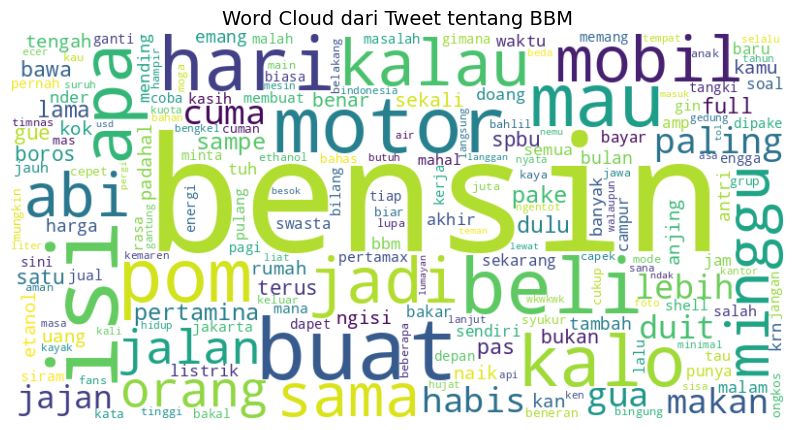

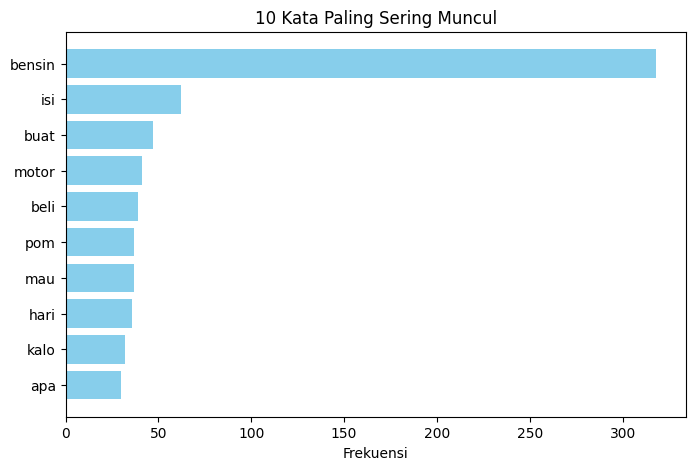

In [ ]:
# === Exploratory Data Analysis (EDA) ===
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

# 1. Hitung jumlah kata per tweet
df['word_count'] = df['clean_text'].apply(lambda x: len(x.split()))

# Statistik dasar
print("Jumlah Tweet :", len(df))
print("Rata-rata panjang tweet (kata):", df['word_count'].mean())
print("Tweet terpanjang:", df['word_count'].max(), "kata")
print("Tweet terpendek:", df['word_count'].min(), "kata")

# 2. Frekuensi kata secara keseluruhan
all_words = ' '.join(df['clean_text']).split()
word_freq = Counter(all_words)

# Lihat 20 kata paling sering muncul
print("\nKata paling sering muncul:")
print(word_freq.most_common(20))

# 3. Visualisasi: Word Cloud
plt.figure(figsize=(10,6))
wc = WordCloud(width=800, height=400, background_color='white',
               collocations=False).generate(' '.join(df['clean_text']))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud dari Tweet tentang BBM', fontsize=14)
plt.show()

# 4. Visualisasi: Top 10 kata paling sering muncul
top_words = dict(word_freq.most_common(10))
plt.figure(figsize=(8,5))
plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
plt.gca().invert_yaxis()
plt.title("10 Kata Paling Sering Muncul")
plt.xlabel("Frekuensi")
plt.show()


Hasil Exploratory Data Analysis (EDA) ini memberikan gambaran awal mengenai karakteristik percakapan warganet di Twitter yang membahas topik BBM. Dari analisis frekuensi kata, terlihat bahwa kata “bensin” mendominasi secara signifikan (318 kemunculan), jauh melebihi kata lainnya. Kata-kata pendukung seperti “isi”, “beli”, “motor”, “pom”, dan “mobil” menegaskan bahwa percakapan pengguna berfokus pada aktivitas pengisian dan pembelian bahan bakar. Visualisasi Word Cloud memperkuat hasil tersebut: kata “bensin” tampil paling besar dan menonjol di tengah, diikuti kata kontekstual seperti “motor”, “isi”, “beli”, “pom”, dan “mobil”. Hal ini menggambarkan bahwa isu utama dalam percakapan pengguna adalah kebutuhan operasional sehari-hari terkait penggunaan kendaraan pribadi dan pengisian bahan bakar. Diagram batang “10 Kata Paling Sering Muncul” menampilkan distribusi kuantitatif yang serupa dengan Word Cloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


10 Kata Paling Sering Muncul (setelah filtering):
bensin: 318
isi: 62
motor: 41
beli: 39
pom: 37
mobil: 26
minggu: 23
abis: 23
orang: 23
jalan: 23


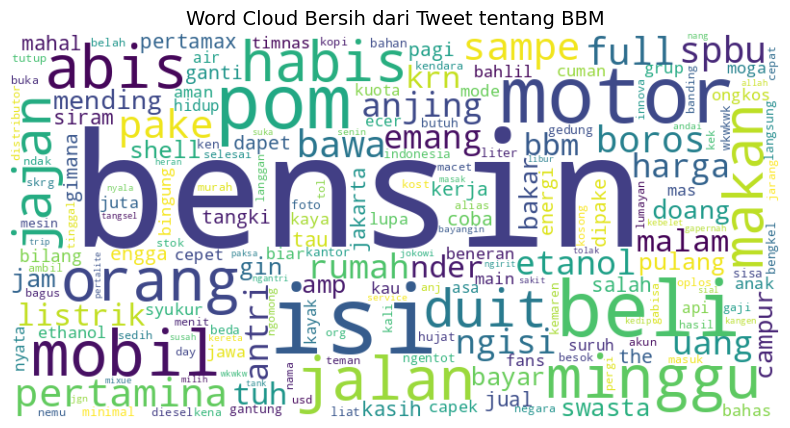

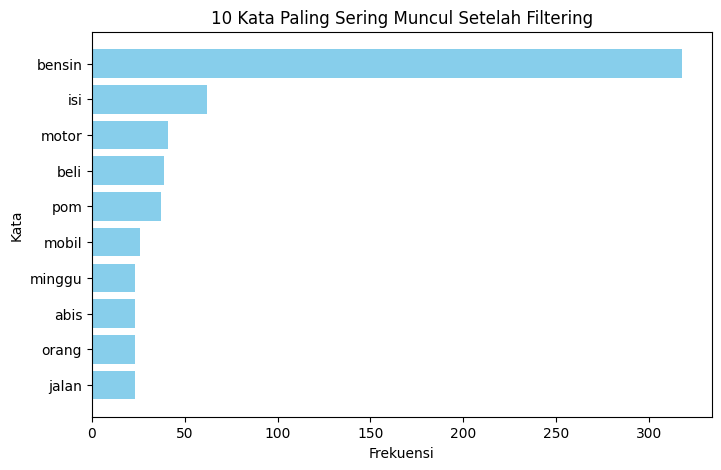

In [ ]:
# === EDA Ulang dengan Custom Stopwords ===
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# pastikan stopwords sudah diunduh
nltk.download('stopwords')
nltk.download('punkt')

# stopwords bawaan + tambahan dari konteks bahasa Indonesia informal
stop_words = set(stopwords.words('indonesian'))
custom_stopwords = {
    "aja", "ya", "nih", "dong", "kan", "lah", "sih",
    "kalo", "kalau", "gue", "gua", "aku", "kamu",
    "jadi", "sama", "apa", "yang", "itu", "di", "ke", "pada",
    "udah", "lagi", "buat", "dulu", "bukan", "cuma", "pas"
}
stop_words.update(custom_stopwords)

# tokenisasi ulang sambil filter stopwords
all_tokens = []
for text in df['clean_text']:
    tokens = word_tokenize(text)
    filtered_tokens = [t for t in tokens if t not in stop_words and len(t) > 2]
    all_tokens.extend(filtered_tokens)

# hitung frekuensi kata
word_freq = Counter(all_tokens)

# tampilkan 10 kata paling sering
top_10 = word_freq.most_common(10)
print("10 Kata Paling Sering Muncul (setelah filtering):")
for w, c in top_10:
    print(f"{w}: {c}")

# buat wordcloud baru
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Bersih dari Tweet tentang BBM", fontsize=14)
plt.show()

# visualisasi top 10 kata
plt.figure(figsize=(8,5))
plt.barh([w for w, _ in top_10[::-1]], [c for _, c in top_10[::-1]], color='skyblue')
plt.title("10 Kata Paling Sering Muncul Setelah Filtering")
plt.xlabel("Frekuensi")
plt.ylabel("Kata")
plt.show()


Program ini bertujuan untuk melakukan analisis eksplorasi data ulang (EDA) pada teks tweet yang sudah melalui tahap cleaning, dengan menambahkan daftar stopwords kustom (custom stopwords).
Langkah ini dilakukan untuk menghapus kata-kata umum dan informal yang sering muncul dalam percakapan di media sosial namun tidak memiliki makna analitis terhadap topik BBM.
Dengan kata lain, program ini ingin memperoleh representasi kata yang lebih bersih dan bermakna sehingga hasil visualisasi benar-benar mencerminkan konteks pembicaraan utama. Pada EDA Sebelumnya fokus kata dominannya masih bercampur pada kata "itu", "aja", "ya". Sedangkan EDA Ulang pada program diatas berfokus pada kata "bensin", "motor", "pom"

# 4 Sentiment Labeling

Lexicon Based Labeling

In [ ]:
# Lexicon
# Contoh lexicon sederhana (bisa diperluas nanti)
positive_words = [
    "bagus", "baik", "hebat", "luar biasa", "menyenangkan", "senang", "gembira",
    "puas", "ramah", "cepat", "terbaik", "suka", "mantap", "keren", "wow",
    "indah", "bersih", "nyaman", "positif", "memuaskan", "top", "rekomendasi",
    "love", "terimakasih", "makasih", "enak", "super", "juara", "segar",
    "menakjubkan", "bagus banget", "bagus sekali", "helpful", "mantul"
]

negative_words = [
    "buruk", "jelek", "parah", "kecewa", "lambat", "benci", "tidak puas",
    "mengecewakan", "sakit", "nggak enak", "susah", "error", "lemot",
    "gagal", "macet", "bete", "payah", "bohong", "ngecewain", "ga jelas",
    "sampah", "malas", "ngeselin", "ngecewa", "ngga suka", "gak suka",
    "berantakan", "rusak", "tidak baik", "tidak bagus", "menyedihkan",
    "ngecewain banget", "ribet", "pelayanan buruk", "parah banget"
]

# Fungsi untuk menghitung skor sentimen
def get_sentiment_score(text):
    words = re.findall(r'\w+', text.lower())  # tokenisasi sederhana
    score = 0
    for word in words:
        if word in positive_words:
            score += 1
        elif word in negative_words:
            score -= 1
    return score

# Fungsi untuk mengubah skor menjadi label
def get_sentiment_label(score):
    if score > 0:
        return "positif"
    elif score < 0:
        return "negatif"
    else:
        return "netral"

# Hitung skor dan label untuk setiap tweet
df["sentiment_score"] = df["clean_text"].apply(get_sentiment_score)
df["sentiment_lexicon"] = df["sentiment_score"].apply(get_sentiment_label)

# Lihat hasilnya
print(df[["clean_text", "sentiment_score", "sentiment_lexicon"]].head(10))

# Cek distribusi label
print("\nDistribusi label sentimen:")
print(df["sentiment_lexicon"].value_counts())

# === Simpan hasil berlabel ke lexicon.csv ===
# pilih kolom yang ada saja (biar fleksibel)
keep_cols = [c for c in [
    "created_at", "full_text", "text", "clean_text",
    "sentiment_score", "sentiment_lexicon"
] if c in df.columns]

df[keep_cols].to_csv("lexicon.csv", index=False, encoding="utf-8-sig")
print("Tersimpan -> lexicon.csv")
df[keep_cols].head()


                                          clean_text  sentiment_score  \
0  biasa malam melipir pom bensin kebelet akhir b...                0   
1                      siap topping bensin full tank                0   
2                         gua bawa korek bawa bensin                0   
3  tangki motor ndak isi air radiator mobil ndak ...                0   
4  padahal gapapa memang bensin masuk rab cuma ya...                0   
5  mau trip bandung jogja tangsel bebas split ben...                0   
6                  teman mau bensin sini punya motor                0   
7  padahal tgl minggu lalu transfer jajan mixue a...                0   
8  sore pulang kerja nemu duit cuma lumayan buat ...                0   
9  kesal dahh malam membuat emosi adek suruh beli...               -1   

  sentiment_lexicon  
0            netral  
1            netral  
2            netral  
3            netral  
4            netral  
5            netral  
6            netral  
7            netral 

,created_at,full_text,clean_text,sentiment_score,sentiment_lexicon
0,Mon Oct 13 16:31:29 +0000 2025,Bisa karena terbiasa malem ini melipir pom ben...,biasa malam melipir pom bensin kebelet akhir b...,0,netral
1,Mon Oct 13 16:31:13 +0000 2025,@deveereeaux Siap topping-nya bensin full tank...,siap topping bensin full tank,0,netral
2,Mon Oct 13 16:25:00 +0000 2025,@BIAG3NCY Gua bawa korek lu bawa bensin ya,gua bawa korek bawa bensin,0,netral
3,Mon Oct 13 16:21:30 +0000 2025,Tangki motor itu ndak boleh di isi air Radiato...,tangki motor ndak isi air radiator mobil ndak ...,0,netral
4,Mon Oct 13 16:19:20 +0000 2025,@dinounaraa @szakumi_ padahal gapapa loh tapi ...,padahal gapapa memang bensin masuk rab cuma ya...,0,netral


Kode ini digunakan untuk melakukan analisis sentimen sederhana berbasis lexicon. Bagian awal berisi daftar kata positif dan negatif yang disimpan dalam variabel positive_words dan negative_words. Daftar ini berfungsi sebagai acuan untuk mengenali emosi dalam teks. Misalnya, kata seperti “bagus”, “hebat”, atau “senang” termasuk ke dalam kata positif, sedangkan “buruk”, “kecewa”, atau “lemot” masuk kategori negatif. Daftar ini sifatnya fleksibel dan bisa diperluas sesuai konteks data yang kita analisis. Selanjutnya ada fungsi get_sentiment_score(text) yang bertugas menghitung skor sentimen dari sebuah teks. Prosesnya dimulai dengan mengubah teks menjadi huruf kecil dan memecahnya menjadi kata-kata. Setiap kata kemudian dicek apakah termasuk ke daftar positif atau negatif. Kalau kata ditemukan di daftar positif, skor akan bertambah satu. Sebaliknya, kalau termasuk negatif, skornya dikurangi satu. Nilai skor akhir inilah yang nantinya menunjukkan arah sentimen dari teks tersebut. Kemudian, fungsi get_sentiment_label(score) digunakan untuk mengubah nilai skor menjadi label sentimen yang lebih mudah dibaca. Jika skornya lebih besar dari nol maka labelnya “positif”, jika kurang dari nol maka “negatif”, dan jika nol maka “netral”. Setelah kedua fungsi ini dibuat, proses dilanjutkan dengan menerapkannya pada kolom clean_text di dataframe. Hasilnya berupa dua kolom baru, yaitu sentiment_score dan sentiment_lexicon, yang masing-masing menyimpan skor dan label sentimen. Setelah itu dilakukan pengecekan hasil awal menggunakan head(10) untuk melihat sepuluh data pertama, serta analisis distribusi label menggunakan value_counts(). Dari hasilnya terlihat bahwa sebagian besar teks memiliki label netral, yakni sebanyak 257, sedangkan yang positif ada 23 dan negatif 20. Hal ini menunjukkan bahwa mayoritas teks tidak mengandung kata yang terlalu positif atau negatif. Tahap terakhir adalah menyimpan hasil analisis ke file lexicon.csv agar bisa digunakan kembali nanti. File ini berisi beberapa kolom penting seperti waktu pembuatan tweet, teks asli, teks yang sudah dibersihkan, skor sentimen, dan label sentimen. Berdasarkan hasil sementara, sebagian besar teks masih tergolong netral, sehingga ke depannya daftar lexicon bisa dikembangkan lagi supaya mampu menangkap nuansa sentimen yang lebih beragam.

## SUPERVISED LEARNING MENGGUNAKAN KNN DAN NAIVE BAYES

amelia

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv('lexicon.csv')

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment_lexicon'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['label'], test_size=0.2, random_state=42)

# Vectorize text
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)
knn_pred = knn.predict(X_test_tfidf)

# Train Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
nb_pred = nb.predict(X_test_tfidf)

# Accuracy
knn_acc = accuracy_score(y_test, knn_pred)
nb_acc = accuracy_score(y_test, nb_pred)

print("Akurasi KNN:", knn_acc)
print("Akurasi Naive Bayes:", nb_acc)
print("\nLaporan Evaluasi Naive Bayes:\n", classification_report(y_test, nb_pred, target_names=le.classes_))


Akurasi KNN: 0.9166666666666666
Akurasi Naive Bayes: 0.9333333333333333

Laporan Evaluasi Naive Bayes:
               precision    recall  f1-score   support

     negatif       0.00      0.00      0.00         2
      netral       0.93      1.00      0.97        56
     positif       0.00      0.00      0.00         2

    accuracy                           0.93        60
   macro avg       0.31      0.33      0.32        60
weighted avg       0.87      0.93      0.90        60



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Di bagian ini, kita mulai masuk ke tahap pembuatan model machine learning untuk mengklasifikasikan sentimen teks menggunakan dua algoritma, yaitu K-Nearest Neighbors (KNN) dan Naive Bayes. Dataset yang digunakan berasal dari file lexicon.csv yang sebelumnya sudah berisi kolom clean_text dan label sentimen hasil analisis awal. Langkah pertama adalah memuat dataset dan mengubah label teks (seperti “positif”, “negatif”, “netral”) menjadi nilai numerik menggunakan LabelEncoder. Setelah itu, data dibagi menjadi dua bagian: data latih dan data uji dengan perbandingan 80:20 agar model bisa belajar dari sebagian besar data dan diuji pada sisanya. Proses selanjutnya adalah vectorization menggunakan TfidfVectorizer, yang berfungsi untuk mengubah teks menjadi bentuk numerik berdasarkan frekuensi kemunculan kata. Metode TF-IDF ini membantu model mengenali seberapa penting sebuah kata dalam dokumen dibandingkan keseluruhan dataset. Model pertama yang digunakan adalah K-Nearest Neighbors (KNN) dengan parameter n_neighbors=5. Model ini bekerja dengan cara mencari lima tetangga terdekat dari setiap teks uji dan menentukan label berdasarkan mayoritas label dari tetangga tersebut. Setelah dilatih menggunakan data latih yang sudah diubah ke bentuk TF-IDF, model menghasilkan prediksi untuk data uji. Model kedua adalah Multinomial Naive Bayes (NB), yang merupakan algoritma populer untuk klasifikasi teks karena efisien dan cocok untuk data berbasis kata. Model ini juga dilatih dan kemudian digunakan untuk memprediksi label dari data uji. Hasil evaluasi menunjukkan bahwa akurasi KNN sebesar 0.9166 dan akurasi Naive Bayes sebesar 0.9333, yang berarti Naive Bayes sedikit lebih unggul. Dari laporan evaluasi, terlihat bahwa model Naive Bayes mampu mengenali kelas “netral” dengan sangat baik (precision 0.93 dan recall 1.00), namun kesulitan mengenali kelas “positif” dan “negatif” karena jumlah datanya sangat sedikit. Nilai macro average yang rendah juga menandakan distribusi label tidak seimbang. Meski begitu, weighted average yang tinggi (0.90 untuk F1-score) menunjukkan performa keseluruhan model masih cukup baik karena mayoritas data netral berhasil diklasifikasikan dengan benar. Ke depannya, model bisa ditingkatkan dengan menyeimbangkan jumlah data di tiap kelas atau menambah variasi kata dalam lexicon supaya distribusi label lebih seimbang dan hasil klasifikasinya lebih akurat.

## Confusion Matriks dan Visualisasi Perbandingan

Amelia

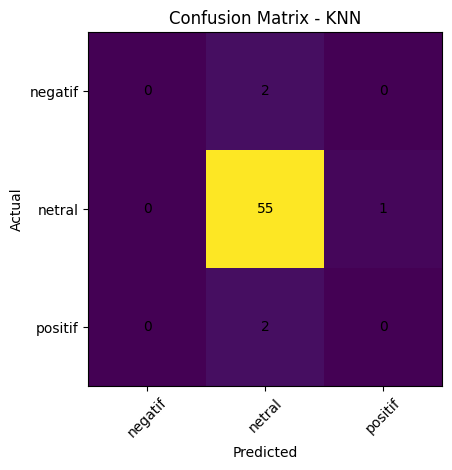

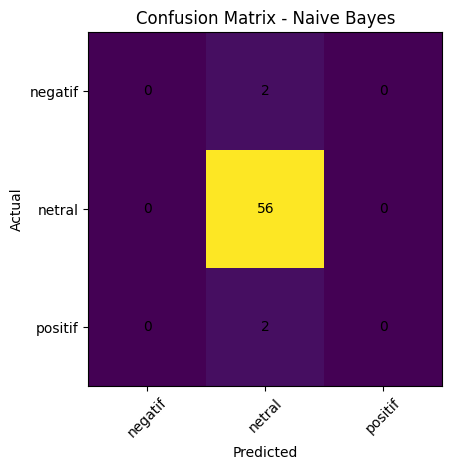

In [ ]:
# Confusion matrices
cm_knn = confusion_matrix(y_test, knn_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
labels = le.classes_

# Plot KNN confusion matrix
plt.figure()
plt.imshow(cm_knn)
plt.title("Confusion Matrix - KNN")
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm_knn[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# Plot Naive Bayes confusion matrix
plt.figure()
plt.imshow(cm_nb)
plt.title("Confusion Matrix - Naive Bayes")
plt.xticks(np.arange(len(labels)), labels, rotation=45)
plt.yticks(np.arange(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm_nb[i, j], ha="center", va="center")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

Bagian ini digunakan untuk menampilkan hasil prediksi model dalam bentuk confusion matrix, supaya kita bisa melihat secara visual seberapa baik model mengenali masing-masing kelas sentimen. Dua confusion matrix dibuat untuk dua model yang digunakan sebelumnya, yaitu KNN dan Naive Bayes. Pertama, kode menghitung confusion matrix untuk masing-masing model dengan fungsi confusion_matrix() dari sklearn. Matriks ini membandingkan antara label sebenarnya (y_test) dan label hasil prediksi model. Selanjutnya, daftar label sentimen diambil dari le.classes_, yang berisi tiga kelas utama: negatif, netral, dan positif. Hasil confusion matrix kemudian divisualisasikan menggunakan matplotlib. Pada bagian plotting, digunakan fungsi imshow() untuk menampilkan matriks dalam bentuk warna, di mana warna yang lebih terang menunjukkan jumlah prediksi yang lebih banyak. Setiap sel juga diberi angka agar mudah dibaca. Label sumbu X menunjukkan nilai prediksi model, sedangkan label sumbu Y menunjukkan nilai aktual di data uji. Dari hasil visualisasi, bisa kita lihat bahwa kedua model (KNN dan Naive Bayes) sama-sama paling sering memprediksi kelas netral. Hampir semua data netral berhasil diprediksi dengan benar oleh kedua model, terlihat dari angka 55 pada KNN dan 56 pada Naive Bayes di posisi tengah matriks. Namun, untuk kelas positif dan negatif, kedua model belum mampu mengenali dengan baik karena semua data di kelas tersebut justru terklasifikasi sebagai netral. Hal ini sejalan dengan hasil evaluasi sebelumnya, di mana precision dan recall untuk kelas positif dan negatif bernilai nol.
Kesimpulannya, dari confusion matrix ini bisa disimpulkan bahwa model masih bias ke kelas mayoritas, yaitu netral. Meskipun begitu, performa pada kelas utama tersebut sudah cukup bagus. Supaya model bisa lebih seimbang, langkah berikutnya yang bisa dilakukan adalah memperbanyak data latih untuk kelas positif dan negatif, atau melakukan teknik data balancing seperti oversampling maupun penambahan variasi kata pada lexicon.

## SENTIMEN ANALISIS DAN PERCOBAAN

In [ ]:
# ==== UJI COBA INPUT KALIMAT ====

def predict_sentiment(text):
    text_tfidf = tfidf.transform([text])

    # Prediksi pakai KNN
    knn_pred_label = le.inverse_transform(knn.predict(text_tfidf))[0]

    # Prediksi pakai Naive Bayes
    nb_pred_label = le.inverse_transform(nb.predict(text_tfidf))[0]

    print("Kalimat:", text)
    print("Prediksi KNN = ", knn_pred_label)
    print("Prediksi Naive Bayes = ", nb_pred_label)

# Coba tes manual
predict_sentiment("makanannya enak banget pelayanan ramah")
predict_sentiment("produk jelek parah aku kecewa")
predict_sentiment("pengiriman biasa aja sih")


Kalimat: makanannya enak banget pelayanan ramah
Prediksi KNN        → positif
Prediksi Naive Bayes → netral
Kalimat: produk jelek parah aku kecewa
Prediksi KNN        → netral
Prediksi Naive Bayes → netral
Kalimat: pengiriman biasa aja sih
Prediksi KNN        → netral
Prediksi Naive Bayes → netral


Pada pengujian, ada tiga contoh kalimat yang digunakan. Untuk kalimat “makanannya enak banget pelayanan ramah”, model KNN memberikan hasil positif sedangkan Naive Bayes memprediksi netral. Ini menunjukkan bahwa KNN lebih peka terhadap ekspresi positif dibandingkan Naive Bayes yang cenderung berhati-hati. Kalimat kedua “produk jelek parah aku kecewa” seharusnya termasuk negatif, tapi kedua model justru menilai netral. Kemungkinan besar ini terjadi karena data latih yang digunakan masih belum seimbang atau kurang variasi pada kata-kata negatif. Sementara untuk kalimat ketiga “pengiriman biasa aja sih”, hasil keduanya netral dan cukup sesuai dengan konteks kalimatnya.

Dari hasil ini bisa disimpulkan kalau model KNN sedikit lebih mampu menangkap pola positif, sementara Naive Bayes masih sering menganggap kalimat sebagai netral. Kecenderungan ini bisa jadi disebabkan oleh distribusi data latih yang tidak seimbang, di mana kelas netral lebih dominan daripada positif atau negatif. Untuk meningkatkan akurasi, model ini bisa dikembangkan dengan menyeimbangkan data antar kelas, menambah variasi kata pada data latih, serta memperbaiki tahap preprocessing seperti menghapus stopword atau melakukan stemming supaya model bisa fokus pada kata yang benar-benar penting.

In [ ]:
def lexicon_sentiment(text):
    text = text.lower()
    pos_count = sum(word in text for word in positive_words)
    neg_count = sum(word in text for word in negative_words)
    if pos_count > neg_count:
        return "Positif"
    elif neg_count > pos_count:
        return "Negatif"
    else:
        return "Netral"

# ===== FUNGSI GABUNG 3 ANALISIS =====
def full_sentiment_test(text):
    text_tfidf = tfidf.transform([text])

    # Machine Learning predictions
    knn_pred = le.inverse_transform(knn.predict(text_tfidf))[0]
    nb_pred = le.inverse_transform(nb.predict(text_tfidf))[0]

    # Lexicon
    lex_pred = lexicon_sentiment(text)

    print("\nInput :", text)
    print("Lexicon Sentiment     →", lex_pred)
    print("KNN Prediction        →", knn_pred)
    print("Naive Bayes Prediction→", nb_pred)

# ===== MODE UJI INPUT =====
while True:
    user_input = input("\nMasukkan kalimat (ketik 'stop' untuk keluar): ")
    if user_input.lower() == "stop":
        break
    full_sentiment_test(user_input)


Input : masa aku ngisi bensin 50 ribu kaya ngisi 20 ribu curang yah
Lexicon Sentiment     → Netral
KNN Prediction        → netral
Naive Bayes Prediction→ netral


Pada bagian ini, kode dibuat untuk menggabungkan tiga pendekatan analisis sentimen sekaligus, yaitu berbasis lexicon, KNN, dan Naive Bayes. Fungsi lexicon_sentiment() bekerja dengan cara menghitung jumlah kata positif dan negatif yang muncul dalam kalimat. Jika jumlah kata positif lebih banyak, hasilnya “Positif”, kalau kata negatif lebih banyak hasilnya “Negatif”, dan kalau keduanya seimbang maka dikategorikan “Netral”. Pendekatan ini mengandalkan daftar kata positif dan negatif yang sudah didefinisikan sebelumnya, jadi sifatnya berbasis aturan, bukan pembelajaran mesin. Selanjutnya, fungsi full_sentiment_test() digunakan untuk menguji sebuah kalimat dengan ketiga metode tersebut sekaligus. Pertama, teks diubah ke bentuk numerik dengan TF-IDF agar bisa diproses oleh model KNN dan Naive Bayes. Setelah itu, hasil prediksi dari kedua model tersebut dibandingkan dengan hasil dari metode lexicon. Semua hasil kemudian ditampilkan agar bisa dilihat perbedaannya secara langsung.

Bagian terakhir berupa mode interaktif, di mana pengguna bisa memasukkan kalimat secara manual, dan sistem akan menampilkan hasil analisis dari ketiga metode. Misalnya, ketika diuji dengan kalimat “masa aku ngisi bensin 50 ribu kaya ngisi 20 ribu curang yah”, ketiga metode—Lexicon, KNN, dan Naive Bayes—sama-sama memberikan hasil netral. Padahal secara konteks kalimat itu mengandung nada negatif atau ketidakpuasan. Ini menunjukkan bahwa sistem masih kurang sensitif terhadap bentuk kalimat sarkastik atau ekspresi tidak langsung. Untuk meningkatkan performa, bisa dilakukan pembaruan pada kamus kata negatif atau pelatihan ulang model dengan data yang lebih beragam, terutama yang memuat gaya bahasa sehari-hari atau sindiran seperti contoh di atas.

# Kesimpulan

Sistem analisis sentimen yang kami bangun sudah bisa berjalan dengan baik secara teknis dan logika pemrograman, tapi dari sisi akurasi makna masih lemah. Model lebih cenderung aman di kelas netral dan belum mampu membedakan nuansa positif-negatif secara halus. Untuk perbaikan ke depan, kami bisa menyempurnakan model dengan langkah-langkah berikut:

1. Menyeimbangkan jumlah data per kelas sebelum training.
2. Menambah daftar kata pada lexicon, terutama kata negatif dan slang.
3. Meningkatkan preprocessing dengan teknik seperti stemming dan stopword khusus bahasa Indonesia.
4. Mencoba model berbasis deep learning seperti LSTM atau BERT Indo agar bisa menangkap konteks kalimat yang lebih kompleks.

